In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))
    def conv_test(image):
        self.conv1(image)

lr = 0.1

In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [16]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
        
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

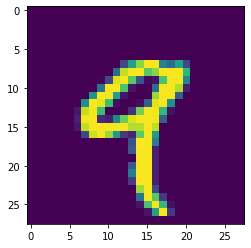

In [17]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[4].reshape((28, 28)))

torch.Size([28, 28])
torch.Size([14, 14])


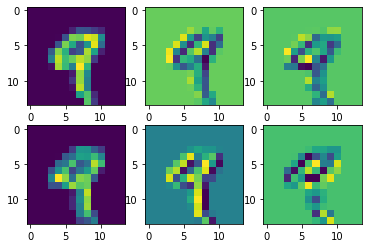

In [95]:
convT = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
X = x_train[4].view(-1, 1, 28, 28)
print(X[0,0].shape)
Cj = convT(X)
print(Cj[0,1].shape)
Cj = Cj.detach()
channel = 16
for i in range(0,6):
    pyplot.subplot(2,3,i+1)
    pyplot.imshow(Cj[0,i])